In [41]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and di

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

### movies_train DATA

+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [2]:
train=pd.read_csv("/content/movies_train.csv")
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
print(train.shape, type(train))

(600, 12) <class 'pandas.core.frame.DataFrame'>


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


+ release_time의 dtype을 object에서 datetime으로 변환해야 함

In [3]:
train['release_time']=pd.to_datetime(train['release_time'])
train['release_time'].dtype # M8: datetime 8문자 

dtype('<M8[ns]')

In [9]:
round(train.describe(),2)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.00,270.00,600.00,600.00,600.00,600.00
mean,100.86,1050442.89,0.88,151.12,3.71,708181.75
std,18.10,1791408.30,1.18,165.65,2.45,1828005.85
min,45.00,1.00,0.00,0.00,0.00,1.00
25%,89.00,20380.00,0.00,17.00,2.00,1297.25
50%,100.00,478423.62,0.00,82.50,3.00,12591.00
75%,114.00,1286568.62,2.00,264.00,4.00,479886.75
max,180.00,17615314.00,5.00,869.00,25.00,14262766.00


In [10]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

+ dir_prev_bfnum만 330개의 결측값 존재

In [11]:
train[train['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [4]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


+ dir_prev_bfnum이 결측치인 관측값들은 모두 dir_prev_num이 0으로 감독이 제작에 참여한 이전 작품이 존재하지 않기 때문에 이전 작품의 평균관객수인 dir_prev_bfnum을 0으로 채워줘야 함  
  

In [5]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
train['dir_prev_bfnum'].isna().sum()

0

## 1. 최장, 최단 상영시간을 가진 영화 제목과 배급사

In [6]:
print(train['time'].max())
print(train['time'].min())

180
45


+ 최장 상영시간은 180분, 최단 상영시간은 45분

In [19]:
train[train['time']==180][['title','distributor']]

,title,distributor
377,내부자들: 디 오리지널,(주)쇼박스


+ 최장 상영시간을 보유한 영화는 '(주)쇼박스' 배급사의 '내부자들:디 오리지널' 

In [18]:
train[train['time']==45][['title','distributor']]

,title,distributor
545,남쪽으로 간다,시네마달


+ 최단 상영시간을 보유한 영화는 '시네마달' 배급사의 '남쪽으로 간다'

## 2. 영화 개봉일 연도별, 분기별 가장 많이 제작된 장르 

In [11]:
train['release_quarter'], train['release_year'] =  (train['release_time'].dt.quarter, train['release_time'].dt.year)
train[['release_time','release_year','release_quarter']]

,release_time,release_year,release_quarter
0,2012-11-22,2012,4
1,2015-11-19,2015,4
2,2013-06-05,2013,2
3,2012-07-12,2012,3
4,2010-11-04,2010,4
...,...,...,...
595,2014-08-13,2014,3
596,2013-03-14,2013,1
597,2010-09-30,2010,3
598,2015-05-14,2015,2


In [17]:
train.groupby(['release_year','release_quarter'])[['genre']].max()

genre
release_year release_quarter      
2010         1                 코미디
             2                 코미디
             3                 코미디
             4                 코미디
2011         1                 코미디
             2                 코미디
             3                 코미디
             4                 코미디
2012         1                 코미디
             2                 코미디
             3                 코미디
             4                 코미디
2013         1                 코미디
             2                 코미디
             3                 코미디
             4                  액션
2014         1                 코미디
             2                 코미디
             3                 코미디
             4                 코미디
2015         1                 코미디
             2                 코미디
             3                 코미디
             4                 코미디

+ 2013년 4분기의 '액션'을 제외하면 각 연도별, 분기별 가장 많이 제작된 영화 장르는 모두 '코미디'이다

## 3. 상영등급별 최다 관객수를 보유한 영화의 정보 

In [45]:
screengroup = train.groupby('screening_rat')
screengroup[['title','director','genre']].max('box_off_num')

,title,director,genre
screening_rat,,,
12세 관람가,히말라야,황인호,코미디
15세 관람가,흉터,황병국,코미디
전체 관람가,희망의 별 - 이퀘지레템바,황석호,코미디
청소년 관람불가,회사원,황철민,코미디


+ 흥미롭게도 4개 영화의 장르가 모두 동일하고 영화 제목이 모두 'ㅎ'자로 시작하며 감독의 성이 모두 '황'이라는 결과가 나왔다 

In [46]:
screengroup[['box_off_num','release_year','dir_prev_bfnum','dir_prev_num','num_staff','num_actor']].max('box_off_num')

,box_off_num,release_year,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
screening_rat,,,,,,
12세 관람가,14262766,2015,7855474.0,4,869,22
15세 관람가,12983841,2015,8801639.0,5,687,25
전체 관람가,4802169,2015,3907784.5,4,372,14
청소년 관람불가,7072501,2015,17615314.0,4,719,16


+ 4개 영화 모두 2015년도 개봉작이고 각 감독의 이전 영화 개수도 4개 정도로 비슷하고 영화의 스텝수와 주연배우수가 모두 상당히 많다
+ 청소년 관람불가 등급인 회사원을 제외하면 나머지 영화는 모두 각 감독의 이전 영화의 평균 관객수보다 관객수가 증가했다

## 4. 이전 영화의 평균 관객수와 현재 영화의 관객수와의 관계 

In [60]:
train1=train[(train['dir_prev_bfnum'] > 0) & (train['box_off_num'] > 0)]
train1.shape

(270, 14)

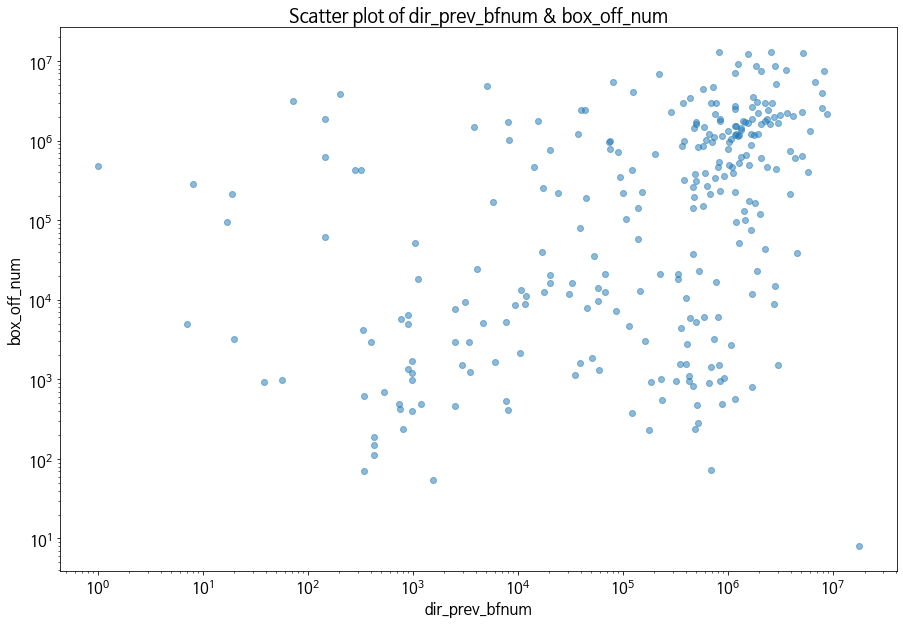

In [97]:
plt.figure(figsize=(15,10))
plt.scatter('dir_prev_bfnum','box_off_num',data=train1, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot of dir_prev_bfnum & box_off_num')
plt.xlabel('dir_prev_bfnum')
plt.ylabel('box_off_num')
plt.show()

+ 감독의 이전 영화의 평균 관객수가 높을수록 관객수가 높아지는 것으로 보이긴 하나 점들이 많이 퍼져있어 큰 상관성을 보이지는 않는다

## 5. 해당 감독이 제작에 참여한 영화의 개수와 현재 영화의 스텝수와의 관계

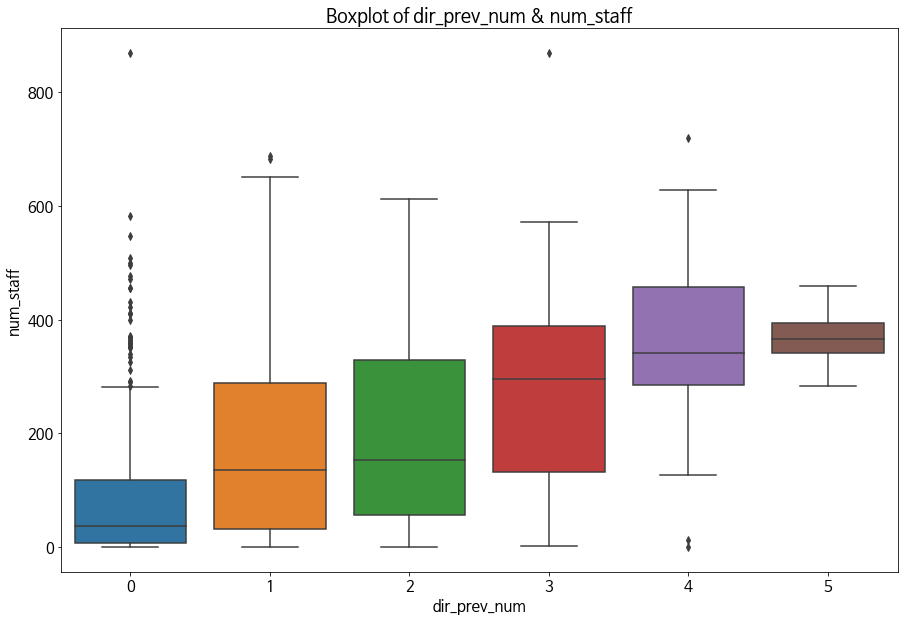

In [98]:
plt.figure(figsize=(15,10))
sns.boxplot(x='dir_prev_num',y='num_staff',data=train)
plt.title('Boxplot of dir_prev_num & num_staff')
plt.xlabel('dir_prev_num')
plt.ylabel('num_staff')
#plt.rc('font', family='NanumBarunGothic', size=15)
plt.show()

+ 감독이 이전에 참여한 영화의 개수가 증가할수록 스텝수도 증가하는 관계를 보인다
+ 특히 0개에서 1개, 2개에서 3개로 이전 영화의 개수가 증가했을 때 중앙값이 큰 폭으로 상승한다

## 6. 영화 장르와 평균 주연배우수와의 관계 

In [143]:
counted = train.groupby('genre').mean().sort_values(by='num_actor', ascending=False)[['num_actor']] 
counted['num_actor'] = round(counted['num_actor'],2)
counted.reset_index(inplace=True)
counted

,genre,num_actor
0,애니메이션,5.67
1,코미디,4.74
2,공포,3.88
3,SF,3.69
4,드라마,3.65
5,액션,3.61
6,느와르,3.59
7,멜로/로맨스,3.41
8,다큐멘터리,3.27
9,서스펜스,3.00


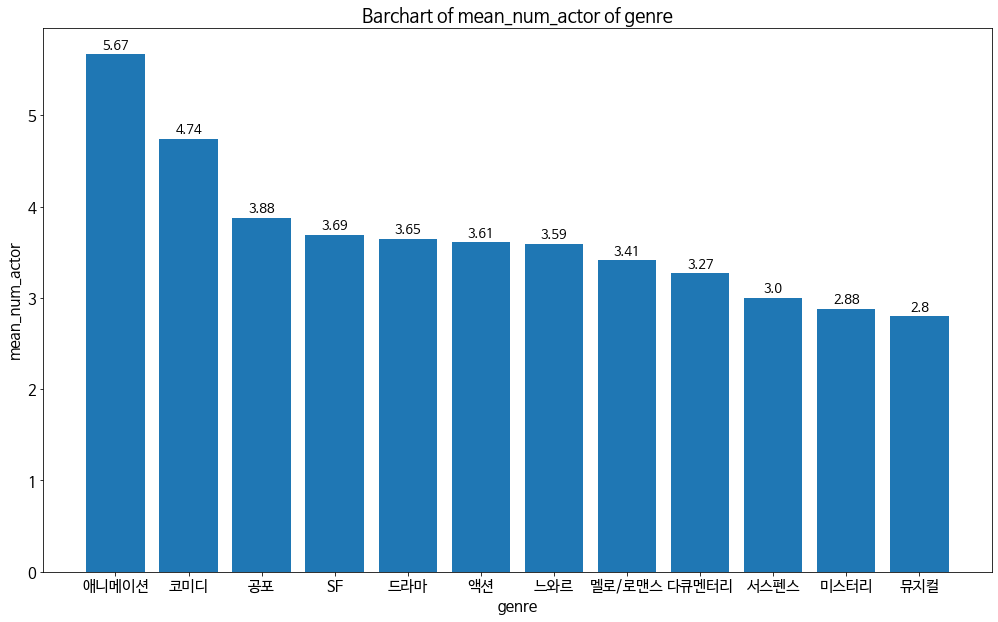

In [145]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot()
bars = plt.bar('genre','num_actor',data=counted)
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.05,counted['num_actor'][i],ha='center',fontsize=13)
plt.rc('font', family='NanumBarunGothic', size=15)
plt.title('Barchart of mean_num_actor of genre')
plt.xlabel('genre')
plt.ylabel('mean_num_actor')
plt.show()

+ 평균 주연배우수가 가장 높은 영화 장르는 '애니메이션', 가장 낮은 영화 장르는 '뮤지컬'이다
+ 장르간 평균 주연배우수의 차이가 크지 않다